## Importing Necessary Libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading the data

In [3]:
# Loading the dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx


In [4]:
categorical_metadata_file_path = r"/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx"
quantitative_metadata_file_path = r"/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx"
functional_metadata_file_path = r"/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"
training_solutions_file_path = r"/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx"


In [5]:
# Reading the Data
categorical = pd.read_excel(categorical_metadata_file_path)
quantitative = pd.read_excel(quantitative_metadata_file_path)
brain_matrices = pd.read_csv(functional_metadata_file_path)
solutions = pd.read_excel(training_solutions_file_path)

In [6]:
# Displaying categorical data
categorical.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [7]:
# Displaying quantitative data
quantitative.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [8]:
# Displaying connectome data
brain_matrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [9]:
brain_matrices.shape

(1213, 19901)

In [10]:
# Displaying solutions data
solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


## Data cleaning and preprocessing 

In [11]:
# Categorical data
missing_values = categorical.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 participant_id                        0
Basic_Demos_Enroll_Year               0
Basic_Demos_Study_Site                0
PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
MRI_Track_Scan_Location               3
Barratt_Barratt_P1_Edu               15
Barratt_Barratt_P1_Occ               31
Barratt_Barratt_P2_Edu              198
Barratt_Barratt_P2_Occ              222
dtype: int64


In [12]:
categorical.shape

(1213, 10)

We can see we have missing values in categorical data as follows:
PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
MRI_Track_Scan_Location               3
Barratt_Barratt_P1_Edu               15
Barratt_Barratt_P1_Occ               31
Barratt_Barratt_P2_Edu              198
Barratt_Barratt_P2_Occ              222
Since Barratt_Barratt_P2_Occ and Barratt_Barratt_P2_Edu have over 100 missing values, we will drop them off. We can impute the missing data with the mode since it is categorical data.We will also need to do more correlation to see how much this column affects the data and perhaps drop it. 

In [13]:
cols_to_drop = ["Barratt_Barratt_P2_Occ", "Barratt_Barratt_P2_Edu"]
categorical = categorical.drop(cols_to_drop, axis = 1)
categorical.shape

(1213, 8)

In [14]:
#calculating mode for columns with missing values
cols_for_mode = ["PreInt_Demos_Fam_Child_Ethnicity","PreInt_Demos_Fam_Child_Race","MRI_Track_Scan_Location","Barratt_Barratt_P1_Edu","Barratt_Barratt_P1_Occ"]
mode = []
for col in cols_for_mode:
    mod = categorical[col].mode()[0]
    mode.append(mod)
print(mode)

[0.0, 0.0, 2.0, 21.0, 0.0]


In [15]:
# imputing missing data
for i in range(0, 5, 1):
    categorical[cols_for_mode[i]] = categorical[cols_for_mode[i]].fillna(mode[i])

print(categorical.isnull().sum())

participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P1_Occ              0
dtype: int64


In [16]:
#Just checking correlation  
def draw_correlation_heatmap(df, exclude_column=None):
    """
    Draws a correlation heatmap for a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to visualize.
    """
    df_encoded = df.copy()  # Create a copy to avoid modifying the original DataFrame

    if exclude_column and exclude_column in df_encoded.columns:
        df_encoded = df_encoded.drop(columns=[exclude_column])

    # Ordinal encode categorical columns
    categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns
    encoder = OrdinalEncoder()
    df_encoded[categorical_cols] = encoder.fit_transform(df_encoded[categorical_cols])

    try:
        correlation_matrix = df_encoded.corr()
    except ValueError:
        print("Error: DataFrame contains non-numeric columns after encoding.")
        return

    plt.figure()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Categorical Correlation Heatmap')
    plt.show()

In [17]:
categorical_columns = ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ']

In [18]:
# showing correlation in  categorical xdataset using chi score
# Create a list to store results
chi_square_results = []
# Loop through each unique pair of categorical variables
for i, var1 in enumerate(categorical_columns):
    for j, var2 in enumerate(categorical_columns):
        if i < j:  # Ensure each pair is only tested once (no duplicates)
            contingency_table = pd.crosstab(categorical[var1], categorical[var2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi_square_results.append([var1, var2, p])  # Store results

# Convert results into a DataFrame
chi_square_df = pd.DataFrame(chi_square_results, columns=["Feature1", "Feature2", "P-Value"])

# Sort by correlation significance (lower p-value = stronger correlation)
chi_square_df = chi_square_df.sort_values(by="P-Value")

# Filter only highly correlated variables (p-value < 0.05)
highly_correlated_vars = chi_square_df[chi_square_df["P-Value"] < 0.05]

low_correlated_variables = chi_square_df[chi_square_df["P-Value"] > 0.05]

highly_correlated_vars

,Feature1,Feature2,P-Value
3,Basic_Demos_Enroll_Year,MRI_Track_Scan_Location,1.602122e-254
8,Basic_Demos_Study_Site,MRI_Track_Scan_Location,6.915866e-177
11,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,1.765813e-138
0,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,4.429781e-127
20,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,9.143951e-59
5,Basic_Demos_Enroll_Year,Barratt_Barratt_P1_Occ,1.438711e-10
16,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,9.781780e-10
14,PreInt_Demos_Fam_Child_Ethnicity,Barratt_Barratt_P1_Occ,1.415786e-07
17,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Occ,4.881432e-06
18,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,5.864154e-06


In [19]:
#draw_correlation_heatmap(categorical, exclude_column='participant_id')#

## Quantitative Data

In [20]:
null_values = quantitative.isnull().sum()
print("Missing Values per Column:\n", null_values)

Missing Values per Column:
 participant_id                  0
EHQ_EHQ_Total                  13
ColorVision_CV_Score           23
APQ_P_APQ_P_CP                 12
APQ_P_APQ_P_ID                 12
APQ_P_APQ_P_INV                12
APQ_P_APQ_P_OPD                12
APQ_P_APQ_P_PM                 12
APQ_P_APQ_P_PP                 12
SDQ_SDQ_Conduct_Problems        9
SDQ_SDQ_Difficulties_Total      9
SDQ_SDQ_Emotional_Problems      9
SDQ_SDQ_Externalizing           9
SDQ_SDQ_Generating_Impact       9
SDQ_SDQ_Hyperactivity           9
SDQ_SDQ_Internalizing           9
SDQ_SDQ_Peer_Problems           9
SDQ_SDQ_Prosocial               9
MRI_Track_Age_at_Scan         360
dtype: int64


In [21]:
# we'll impute values as a mean of column
quantitative_imputed = quantitative.copy()
for column in quantitative_imputed.columns:
        if pd.api.types.is_numeric_dtype(quantitative_imputed[column]): #only impute numeric columns.
            column_mean = quantitative_imputed[column].mean()
            quantitative_imputed[column] = quantitative_imputed[column].fillna(column_mean)

In [22]:
missed = quantitative_imputed.isnull().sum()
print("Missing values per column are", missed)

Missing values per column are participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64


In [23]:
quantitative_metadata_skewness = quantitative_imputed.drop(columns='participant_id')

In [24]:
# Compute skewness for all quantitative variables
skewness_values = quantitative_metadata_skewness.skew()


# Convert to DataFrame for better visualization
skewness_df = pd.DataFrame(skewness_values, columns=["Skewness"]).sort_values(by="Skewness", ascending=False)

In [25]:
skewness_df

,Skewness
APQ_P_APQ_P_CP,1.913006
SDQ_SDQ_Conduct_Problems,1.004756
SDQ_SDQ_Emotional_Problems,0.931379
APQ_P_APQ_P_PM,0.909913
SDQ_SDQ_Peer_Problems,0.798819
SDQ_SDQ_Internalizing,0.723983
MRI_Track_Age_at_Scan,0.648296
SDQ_SDQ_Difficulties_Total,0.319860
SDQ_SDQ_Externalizing,0.187244
SDQ_SDQ_Generating_Impact,0.165812


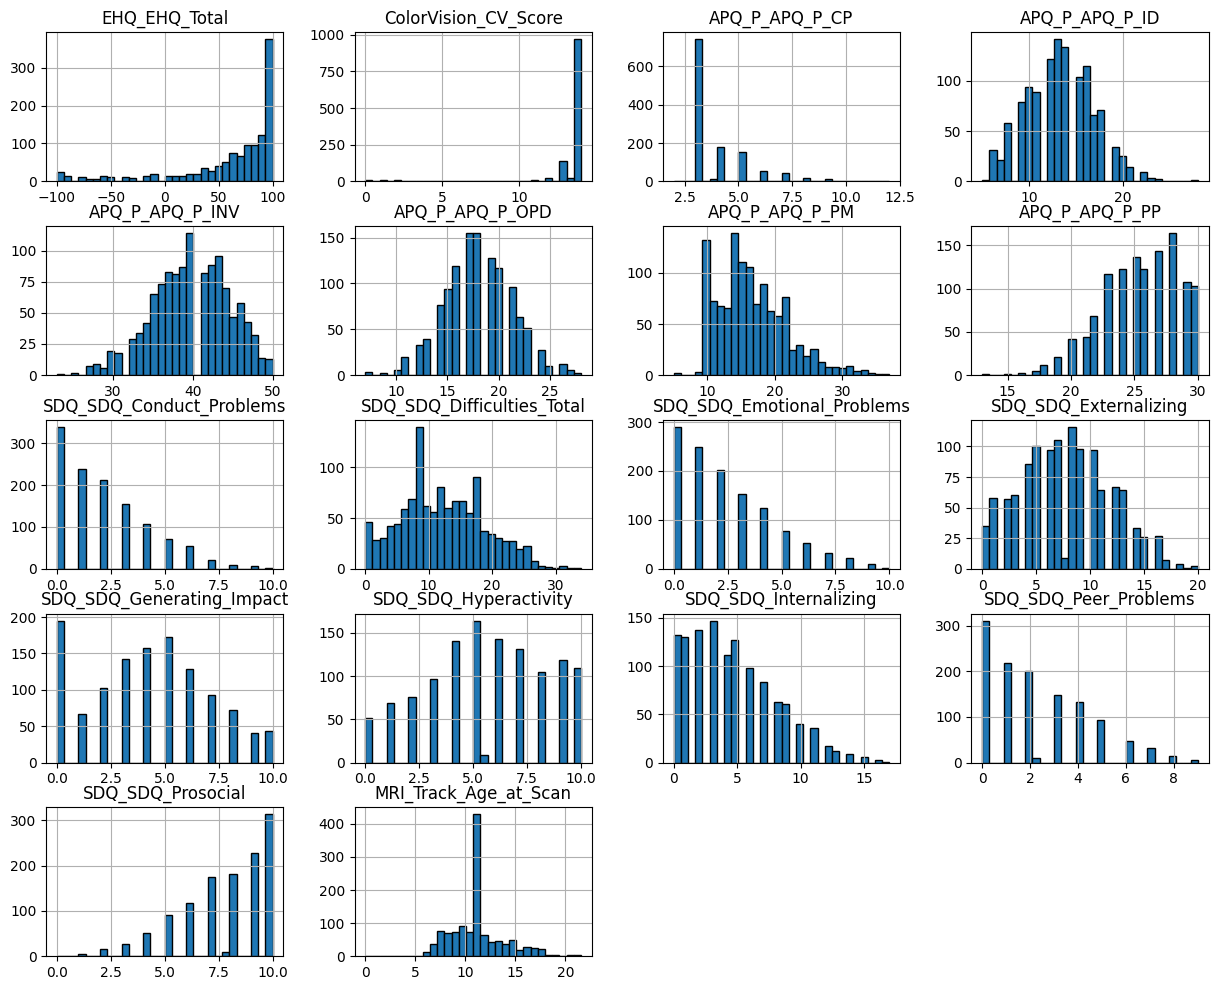

In [26]:
# Plot distribution of key numerical features
quantitative_imputed.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.title("Distribution of Quantitative Features", fontsize=16)
plt.show()

##### Analysis of Skewness for All Variables
Skewness measures asymmetry in the distribution of data:

<li>Positive skew (>0) → Right-skewed (long right tail)</li>
<li>Negative skew (<0) → Left-skewed (long left tail)</li>
<li>Near zero (~0) → Symmetric (normal distribution)</li>

##### Variables That Are Highly Skewed
##### Right-Skewed (Positive Skewness)
<li>APQ_P_APQ_P_CP (1.57) → Highly skewed</li>
<li>SDQ_SDQ_Conduct_Problems (1.01) → Moderately skewed</li>
<li>SDQ_SDQ_Emotional_Problems (0.93) → Slightly skewed</li>
<li>SDQ_SDQ_Peer_Problems (0.80) → Slightly skewed</li>
<li>SDQ_SDQ_Internalizing (0.72) → Mildly skewed</li>

##### How it Affects Analysis
<li>Right-skewed data pulls the mean upwards, making extreme values overly influential.</li>
<li>Some models (e.g., Logistic Regression) may struggle to capture patterns accurately.</li>

##### Possible Fix
<li>Log Transformation: log(x + 1)</li>
<li>Box-Cox Transformation (for normally distributed results)</li>


##### Left-Skewed (Negative Skewness)
<li>ColorVision_CV_Score (-4.00) → Very highly skewed</li>
<li>APQ_P_APQ_P_PP (-2.71) → Highly skewed</li>
<li>APQ_P_APQ_P_INV (-2.48) → Highly skewed</li>
<li>EHQ_EHQ_Total (-1.62) → Strongly skewed</li>
<li>APQ_P_APQ_P_OPD (-0.90) → Moderately skewed</li>
<li>SDQ_SDQ_Prosocial (-0.98) → Slightly skewed</li>

##### How it Affects Analysis
<li>Left-skewed data pulls the mean down, leading to underestimation of true central tendency.</li>
<li> It reduces variance, making it hard for some models to learn.</li>

##### Possible Fix
<li>Power Transformations: sqrt(x) or x^c (where c < 1)</li>
<li>Exponential Scaling: Convert to positive skew (x^2)</li>

##### Variables that are nearly Normal
<li>SDQ_SDQ_Hyperactivity (-0.16) → Almost symmetric</li>
<li>SDQ_SDQ_Generating_Impact (0.17) → Almost symmetric</li>
<li>SDQ_SDQ_Externalizing (0.17) → Almost symmetric</li>
<li>SDQ_SDQ_Difficulties_Total (0.30) → Nearly normal</li>
No Fix Needed for these as they are close to normal distribution.

## Brain Data

In [27]:
absent_values = brain_matrices.isnull().sum()
print("Missing Values per Column:\n", absent_values)

Missing Values per Column:
 participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


In [28]:
missing_columns = absent_values[absent_values > 0]
print(missing_columns)


Series([], dtype: int64)


In [29]:
# Correlation matrix for brain matrices
brain = brain_matrices.drop('participant_id', axis = 1)
#brain_transposed = brain.T
#correlation_matrix = brain_transposed.corr().abs()
correlation_matrix = brain.corr().abs()

In [30]:
print(correlation_matrix)

                      0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0throw_1thcolumn              1.000000          0.016893          0.389889   
0throw_2thcolumn              0.016893          1.000000          0.306656   
0throw_3thcolumn              0.389889          0.306656          1.000000   
0throw_4thcolumn              0.178721          0.249765          0.368221   
0throw_5thcolumn              0.004289          0.360063          0.254573   
...                                ...               ...               ...   
196throw_198thcolumn          0.004019          0.029338          0.042890   
196throw_199thcolumn          0.012060          0.025618          0.034089   
197throw_198thcolumn          0.003417          0.027492          0.009657   
197throw_199thcolumn          0.009444          0.019022          0.024028   
198throw_199thcolumn          0.008074          0.027881          0.046642   

                      0throw_4thcolumn  0throw_5thcolumn  0thro

In [31]:
def get_least_correlated_columns_from_matrix(correlation_matrix, top_n=30):
    """
    Identifies the top N least correlated column pairs from an existing
    correlation matrix.

    Args:
        correlation_matrix (pd.DataFrame): The pre-calculated correlation matrix
                                           (absolute values are recommended).
        top_n (int): The number of least correlated column pairs to return.
                     Defaults to 20.

    Returns:
        list: A list of tuples, where each tuple contains a pair of column names
              and their correlation value, sorted from least to most
              correlated.
              Returns an empty list if the correlation matrix has fewer than 2 columns.
    """
    if correlation_matrix.shape[0] < 2:
        print("Correlation matrix must have at least two columns/rows to identify correlations.")
        return []

    if not isinstance(correlation_matrix, pd.DataFrame):
        print("Input must be a Pandas DataFrame representing the correlation matrix.")
        return []

    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    stacked_correlations = upper_triangle.stack()
    sorted_correlations = stacked_correlations.sort_values()

    least_correlated_pairs = []
    for (col1, col2), correlation in sorted_correlations.head(top_n).items():
        least_correlated_pairs.append(((col1, col2), correlation))

    return least_correlated_pairs

In [32]:
least_correlated_pairs = get_least_correlated_columns_from_matrix(correlation_matrix, top_n=30)

In [33]:
def get_unique_columns_from_least_correlated_pairs(least_correlated_pairs):
    """
    Extracts a list of unique column names from the list of least correlated pairs.

    Args:
        least_correlated_pairs (list): A list of tuples, where each tuple contains
                                       a pair of column names (tuple) and their
                                       correlation value.

    Returns:
        list: A list of unique column names found in the input list.
    """
    unique_columns = set()
    for pair, _ in least_correlated_pairs:
        unique_columns.add(pair[0])
        unique_columns.add(pair[1])
    return sorted(list(unique_columns))

In [34]:
unique_brain_columns = get_unique_columns_from_least_correlated_pairs(least_correlated_pairs)
print(unique_brain_columns)

['0throw_10thcolumn', '106throw_198thcolumn', '117throw_127thcolumn', '123throw_174thcolumn', '129throw_185thcolumn', '131throw_154thcolumn', '134throw_163thcolumn', '146throw_193thcolumn', '155throw_192thcolumn', '15throw_142thcolumn', '15throw_43thcolumn', '176throw_181thcolumn', '177throw_180thcolumn', '18throw_187thcolumn', '24throw_103thcolumn', '26throw_112thcolumn', '26throw_64thcolumn', '29throw_171thcolumn', '2throw_138thcolumn', '2throw_67thcolumn', '30throw_102thcolumn', '33throw_113thcolumn', '34throw_115thcolumn', '34throw_163thcolumn', '36throw_126thcolumn', '36throw_52thcolumn', '38throw_131thcolumn', '38throw_180thcolumn', '47throw_92thcolumn', '4throw_55thcolumn', '53throw_190thcolumn', '53throw_63thcolumn', '57throw_93thcolumn', '58throw_150thcolumn', '5throw_143thcolumn', '5throw_37thcolumn', '60throw_105thcolumn', '60throw_130thcolumn', '63throw_78thcolumn', '65throw_86thcolumn', '67throw_155thcolumn', '74throw_192thcolumn', '7throw_172thcolumn', '80throw_109thcolum

In [35]:
brain_2 = brain[unique_brain_columns]
brain_2.head()
brain_2.shape

(1213, 59)

In [36]:
#brain4 = pd.concat([brain2_transposed, brain_matrices['participant_id']], axis = 1)
#brain4.head()

In [37]:
#brain2_transposed = brain_2.T
#brain2_transposed.head()

In [38]:
brain3 = pd.concat([brain_2, brain_matrices['participant_id']], axis = 1)
brain3.head()

,0throw_10thcolumn,106throw_198thcolumn,117throw_127thcolumn,123throw_174thcolumn,129throw_185thcolumn,131throw_154thcolumn,134throw_163thcolumn,146throw_193thcolumn,155throw_192thcolumn,15throw_142thcolumn,...,8throw_163thcolumn,91throw_164thcolumn,93throw_96thcolumn,94throw_142thcolumn,97throw_181thcolumn,97throw_198thcolumn,99throw_160thcolumn,9throw_163thcolumn,9throw_171thcolumn,participant_id
0,0.470063,0.205952,0.204394,0.081491,0.153070,-0.030942,-0.085600,-0.249347,0.344477,-0.171529,...,-0.059598,-0.203783,-0.005416,-0.226106,0.107269,0.377004,-0.171467,-0.093220,0.114239,70z8Q2xdTXM3
1,0.276350,-0.208400,0.391828,-0.149975,-0.043292,0.052592,0.353256,-0.102508,0.406254,0.207626,...,-0.125171,-0.238789,-0.031732,0.035748,0.004053,-0.088266,0.097141,-0.089545,-0.125171,WHWymJu6zNZi
2,0.378557,0.001889,0.323522,-0.176948,-0.174885,-0.097835,0.212941,-0.337781,0.199775,0.176970,...,0.127168,-0.210825,-0.007614,0.071602,-0.074637,-0.129105,-0.070148,-0.013095,-0.053396,4PAQp1M6EyAo
3,0.259596,0.087578,0.509353,0.160294,-0.118765,0.138948,0.258900,-0.366407,-0.169971,0.261543,...,0.241980,-0.160315,-0.234203,0.028408,0.391760,0.186346,0.023153,0.244235,-0.530582,obEacy4Of68I
4,0.331445,0.038815,0.124480,-0.045351,-0.143010,-0.122372,0.240930,-0.336499,0.208698,0.044016,...,0.157027,-0.443164,-0.184003,-0.108890,0.453819,-0.037650,0.077355,0.282779,-0.070766,s7WzzDcmDOhF


## Merging the three Datasets Now

In [39]:
# Merging Quantitative and categorical data
df1 = pd.merge(categorical, quantitative_imputed, on='participant_id', how='left')

In [40]:
# Now merging with brain data
df2 = pd.merge(df1, brain3, on='participant_id', how='outer')
df2.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,...,87throw_164thcolumn,8throw_163thcolumn,91throw_164thcolumn,93throw_96thcolumn,94throw_142thcolumn,97throw_181thcolumn,97throw_198thcolumn,99throw_160thcolumn,9throw_163thcolumn,9throw_171thcolumn
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,100.00,13.0,...,-0.472245,0.195200,-0.546013,-0.251958,0.085049,0.170224,-0.125576,-0.035546,0.184317,-0.109406
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,92.27,14.0,...,-0.398286,0.296505,-0.355392,-0.034125,-0.056367,0.117651,-0.076498,0.224914,0.108341,-0.140895
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,86.67,14.0,...,-0.205298,0.101994,-0.333793,-0.129884,-0.218485,0.588319,-0.115209,-0.023323,0.235300,-0.214985
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,93.34,14.0,...,-0.053066,0.181057,-0.226689,-0.114930,0.089548,0.279762,-0.247351,0.121317,0.274401,-0.036201
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,0.00,14.0,...,-0.395283,-0.027122,-0.312824,-0.128357,0.133031,-0.118465,-0.116668,0.351910,-0.092367,-0.083716


In [41]:
# Now merging with solutions data
df = pd.merge(df2, solutions, on='participant_id', how='left')
df.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,...,91throw_164thcolumn,93throw_96thcolumn,94throw_142thcolumn,97throw_181thcolumn,97throw_198thcolumn,99throw_160thcolumn,9throw_163thcolumn,9throw_171thcolumn,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,100.00,13.0,...,-0.546013,-0.251958,0.085049,0.170224,-0.125576,-0.035546,0.184317,-0.109406,1,0
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,92.27,14.0,...,-0.355392,-0.034125,-0.056367,0.117651,-0.076498,0.224914,0.108341,-0.140895,1,0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,86.67,14.0,...,-0.333793,-0.129884,-0.218485,0.588319,-0.115209,-0.023323,0.235300,-0.214985,0,1
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,93.34,14.0,...,-0.226689,-0.114930,0.089548,0.279762,-0.247351,0.121317,0.274401,-0.036201,0,1
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,0.00,14.0,...,-0.312824,-0.128357,0.133031,-0.118465,-0.116668,0.351910,-0.092367,-0.083716,1,0


In [42]:
#Checking for missing values
empty = df.isnull().sum()
print(empty)

participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
                                   ..
99throw_160thcolumn                 0
9throw_163thcolumn                  0
9throw_171thcolumn                  0
ADHD_Outcome                        0
Sex_F                               0
Length: 87, dtype: int64


## Time To Train a Model Now 

In [43]:
df = df.drop('participant_id', axis = 1)

In [44]:
# Selecting X and Y
X= df.drop(columns=["ADHD_Outcome", "Sex_F"])
y = df[["ADHD_Outcome", "Sex_F"]] 

In [45]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns



In [46]:
def one_hot_encode_categorical_features(df, categorical_features):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Fit and transform the categorical features
    encoded_data = encoder.fit_transform(df[categorical_features])

    # Get the names of the new one-hot encoded columns
    feature_names = encoder.get_feature_names_out(categorical_features)
    encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=df.index)

    # Drop the original categorical columns and concatenate the encoded ones
    df_encoded = df.drop(columns=categorical_features)
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

    return df_encoded

In [47]:
df1= one_hot_encode_categorical_features(df, categorical_features)
df1.head()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,...,91throw_164thcolumn,93throw_96thcolumn,94throw_142thcolumn,97throw_181thcolumn,97throw_198thcolumn,99throw_160thcolumn,9throw_163thcolumn,9throw_171thcolumn,ADHD_Outcome,Sex_F
0,2019,4,1.0,0.0,3.0,21.0,45.0,100.00,13.0,3.0,...,-0.546013,-0.251958,0.085049,0.170224,-0.125576,-0.035546,0.184317,-0.109406,1,0
1,2017,1,0.0,9.0,2.0,21.0,0.0,92.27,14.0,3.0,...,-0.355392,-0.034125,-0.056367,0.117651,-0.076498,0.224914,0.108341,-0.140895,1,0
2,2017,1,1.0,2.0,2.0,9.0,0.0,86.67,14.0,3.0,...,-0.333793,-0.129884,-0.218485,0.588319,-0.115209,-0.023323,0.235300,-0.214985,0,1
3,2018,1,3.0,8.0,2.0,18.0,10.0,93.34,14.0,3.0,...,-0.226689,-0.114930,0.089548,0.279762,-0.247351,0.121317,0.274401,-0.036201,0,1
4,2018,1,0.0,1.0,2.0,12.0,0.0,0.00,14.0,8.0,...,-0.312824,-0.128357,0.133031,-0.118465,-0.116668,0.351910,-0.092367,-0.083716,1,0


In [48]:
# Test,Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
def scale_X_Train(df, numerical_features):
            # Create a StandardScaler instance
        scaler = StandardScaler()

        # Create a copy of the DataFrame to avoid modifying the original
        df_scaled = df.copy()

        # Fit and transform the numerical features
        df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

        return df_scaled

In [50]:
def scale_X_Test(df, numerical_features):
            # Create a StandardScaler instance
        scaler = StandardScaler()

        # Create a copy of the DataFrame to avoid modifying the original
        df_scaled = df.copy()

        # Fit and transform the numerical features
        df_scaled[numerical_features] = scaler.transform(df_scaled[numerical_features])

        return df_scaled

In [51]:
#df5 = scale_numerical_features(df4, numerical_features)
#df5.head()

In [52]:
#X_train_scaled = scale_X_Train(X_train, numerical_features)
#X_test_scaled = scale_X_Test(X_test, numerical_features)
scaler = StandardScaler()

# Fit the scaler to the training data.
scaler.fit(X_train[numerical_features])

# Transform both the training and test data.
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [53]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_reansform(X_train)
#X_test_scaled = scaler.fit(X_test)

In [54]:
# 1. Using Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## Evaluating my first Model

In [55]:
# Assuming 'ADHD' is the first column (index 1) in y and y_pred_rf
y_test_adhd = y_test['ADHD_Outcome'].values
y_pred_adhd_rf = y_pred_rf[:, 0]

print("\nEvaluation for ADHD:")
print("Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd_rf))
print("F1-Score (Weighted):", f1_score(y_test_adhd, y_pred_adhd_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_adhd, y_pred_adhd_rf))


# Assuming 'Sex' is the second column (index 0) in y and y_pred_rf
y_test_sex = y_test['Sex_F'].values
y_pred_sex_rf = y_pred_rf[:, 1]

print("\nEvaluation for Sex:")
print("Accuracy:", accuracy_score(y_test_sex, y_pred_sex_rf))
print("F1-Score (Weighted):", f1_score(y_test_sex, y_pred_sex_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_sex, y_pred_sex_rf))


Evaluation for ADHD:
Accuracy: 0.7818930041152263
F1-Score (Weighted): 0.7669033655550573

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.50      0.61        84
           1       0.78      0.93      0.85       159

    accuracy                           0.78       243
   macro avg       0.79      0.72      0.73       243
weighted avg       0.78      0.78      0.77       243


Evaluation for Sex:
Accuracy: 0.6748971193415638
F1-Score (Weighted): 0.5740874109496816

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.97      0.80       165
           1       0.44      0.05      0.09        78

    accuracy                           0.67       243
   macro avg       0.56      0.51      0.45       243
weighted avg       0.61      0.67      0.57       243



## Testing Other models

In [56]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [57]:
models = {
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

for model_name, model in models.items():
    print(f"\n--- Training and Evaluating {model_name} ---")

    multi_output_model = MultiOutputClassifier(model)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', multi_output_model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    y_test_sex = y_test['Sex_F'].values
    y_pred_sex = y_pred[:, 1]
    y_test_adhd = y_test['ADHD_Outcome'].values
    y_pred_adhd = y_pred[:, 0]

    print("\nSex Evaluation:")
    print("Accuracy:", accuracy_score(y_test_sex, y_pred_sex))
    print("F1-Score (Weighted):", f1_score(y_test_sex, y_pred_sex, average='weighted'))
    print("Classification Report:\n", classification_report(y_test_sex, y_pred_sex))

    print("\nADHD Evaluation:")
    print("Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))
    print("F1-Score (Weighted):", f1_score(y_test_adhd, y_pred_adhd, average='weighted'))
    print("Classification Report:\n", classification_report(y_test_adhd, y_pred_adhd))




--- Training and Evaluating XGBoost ---

Sex Evaluation:
Accuracy: 0.6872427983539094
F1-Score (Weighted): 0.6607105531242642
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       165
           1       0.52      0.31      0.39        78

    accuracy                           0.69       243
   macro avg       0.62      0.59      0.59       243
weighted avg       0.66      0.69      0.66       243


ADHD Evaluation:
Accuracy: 0.7860082304526749
F1-Score (Weighted): 0.7706152090465817
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.50      0.62        84
           1       0.78      0.94      0.85       159

    accuracy                           0.79       243
   macro avg       0.79      0.72      0.73       243
weighted avg       0.79      0.79      0.77       243


--- Training and Evaluating SVM ---

Sex Evaluation:
Accuracy: 0.7160493827160493
F

In [58]:
models = {
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

for model_name, model in models.items():
    print(f"\n--- Training and Evaluating {model_name} ---")

    multi_output_model = MultiOutputClassifier(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_test_sex = y_test['Sex_F'].values
    y_pred_sex = y_pred[:, 1]
    y_test_adhd = y_test['ADHD_Outcome'].values
    y_pred_adhd = y_pred[:, 0]

    print("\nSex Evaluation:")
    print("Accuracy:", accuracy_score(y_test_sex, y_pred_sex))
    print("F1-Score (Weighted):", f1_score(y_test_sex, y_pred_sex, average='weighted'))
    print("Classification Report:\n", classification_report(y_test_sex, y_pred_sex))

    print("\nADHD Evaluation:")
    print("Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd))
    print("F1-Score (Weighted):", f1_score(y_test_adhd, y_pred_adhd, average='weighted'))
    print("Classification Report:\n", classification_report(y_test_adhd, y_pred_adhd))




--- Training and Evaluating XGBoost ---

Sex Evaluation:
Accuracy: 0.691358024691358
F1-Score (Weighted): 0.6639840135775095
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       165
           1       0.53      0.31      0.39        78

    accuracy                           0.69       243
   macro avg       0.63      0.59      0.59       243
weighted avg       0.67      0.69      0.66       243


ADHD Evaluation:
Accuracy: 0.7860082304526749
F1-Score (Weighted): 0.7677084720399222
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.48      0.61        84
           1       0.77      0.95      0.85       159

    accuracy                           0.79       243
   macro avg       0.80      0.71      0.73       243
weighted avg       0.79      0.79      0.77       243


--- Training and Evaluating SVM ---


ValueError: y should be a 1d array, got an array of shape (970, 2) instead.

## Downsampling Male data

In [59]:
train_df = pd.concat([X_train, y_train], axis=1)
male_df = train_df[train_df['Sex_F'] == 0]  # 0 represents male
female_df = train_df[train_df['Sex_F'] == 1]  # 1 represents female

male_downsampled = male_df.sample(len(female_df), random_state=42)
train_df_balanced = pd.concat([female_df, male_downsampled])

target_columns = ["ADHD_Outcome", "Sex_F"]

X_train_balanced = train_df_balanced.drop(target_columns, axis=1)
y_train_balanced = train_df_balanced[target_columns]

## Evaluating with balanced data

In [60]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)

In [61]:
# Assuming 'ADHD' is the first column (index 1) in y and y_pred_rf
y_test_adhd = y_test['ADHD_Outcome'].values
y_pred_adhd_rf = y_pred_rf[:, 0]

print("\nEvaluation for ADHD:")
print("Accuracy:", accuracy_score(y_test_adhd, y_pred_adhd_rf))
print("F1-Score (Weighted):", f1_score(y_test_adhd, y_pred_adhd_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_adhd, y_pred_adhd_rf))


# Assuming 'Sex' is the second column (index 0) in y and y_pred_rf
y_test_sex = y_test['Sex_F'].values
y_pred_sex_rf = y_pred_rf[:, 1]

print("\nEvaluation for Sex:")
print("Accuracy:", accuracy_score(y_test_sex, y_pred_sex_rf))
print("F1-Score (Weighted):", f1_score(y_test_sex, y_pred_sex_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_sex, y_pred_sex_rf))


Evaluation for ADHD:
Accuracy: 0.7777777777777778
F1-Score (Weighted): 0.7658314226443935

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.52      0.62        84
           1       0.78      0.91      0.84       159

    accuracy                           0.78       243
   macro avg       0.77      0.72      0.73       243
weighted avg       0.78      0.78      0.77       243


Evaluation for Sex:
Accuracy: 0.5596707818930041
F1-Score (Weighted): 0.5742574171546239

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.55      0.63       165
           1       0.38      0.58      0.46        78

    accuracy                           0.56       243
   macro avg       0.56      0.56      0.54       243
weighted avg       0.62      0.56      0.57       243



In [62]:
import joblib 

In [63]:
svm_model = SVC(random_state=42)
multi_output_svm = MultiOutputClassifier(svm_model)
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', multi_output_svm)])

svm_pipeline.fit(X_train, y_train)

# Save the trained SVM pipeline
joblib.dump(svm_pipeline, 'trained_svm_pipeline.joblib')
print("Trained SVM pipeline saved to 'trained_svm_pipeline.joblib'")

y_pred_svm = svm_pipeline.predict(X_test)

y_test_sex_svm = y_test['Sex_F'].values
y_pred_sex_svm = y_pred_svm[:, 1]
y_test_adhd_svm = y_test['ADHD_Outcome'].values
y_pred_adhd_svm = y_pred_svm[:, 0]

print("\nSVM Evaluation on Test Data:")
print("\nSex Evaluation:")
print("Accuracy:", accuracy_score(y_test_sex_svm, y_pred_sex_svm))
print("F1-Score (Weighted):", f1_score(y_test_sex_svm, y_pred_sex_svm, average='weighted'))
print("Classification Report:\n", classification_report(y_test_sex_svm, y_pred_sex_svm))

print("\nADHD Evaluation:")
print("Accuracy:", accuracy_score(y_test_adhd_svm, y_pred_adhd_svm))
print("F1-Score (Weighted):", f1_score(y_test_adhd_svm, y_pred_adhd_svm, average='weighted'))
print("Classification Report:\n", classification_report(y_test_adhd_svm, y_pred_adhd_svm))

Trained SVM pipeline saved to 'trained_svm_pipeline.joblib'

SVM Evaluation on Test Data:

Sex Evaluation:
Accuracy: 0.7160493827160493
F1-Score (Weighted): 0.6512267972528223
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       165
           1       0.74      0.18      0.29        78

    accuracy                           0.72       243
   macro avg       0.73      0.57      0.56       243
weighted avg       0.72      0.72      0.65       243


ADHD Evaluation:
Accuracy: 0.7613168724279835
F1-Score (Weighted): 0.7391711215681254
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.43      0.55        84
           1       0.76      0.94      0.84       159

    accuracy                           0.76       243
   macro avg       0.77      0.68      0.70       243
weighted avg       0.77      0.76      0.74       243



## Preparing unseen data

In [65]:
brain_test_data= r"/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
categorical_test_data = r'/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx'
quantitative_test_data =r'/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx'

In [66]:
brain_test_1 = pd.read_csv(brain_test_data)
categorical_test_1 = pd.read_excel(categorical_test_data) 
quantitative_test_1 = pd.read_excel(quantitative_test_data)

## Processing Test data

In [67]:
brain_test = brain_test_1[unique_brain_columns]
brain_test.head()

,0throw_10thcolumn,106throw_198thcolumn,117throw_127thcolumn,123throw_174thcolumn,129throw_185thcolumn,131throw_154thcolumn,134throw_163thcolumn,146throw_193thcolumn,155throw_192thcolumn,15throw_142thcolumn,...,87throw_164thcolumn,8throw_163thcolumn,91throw_164thcolumn,93throw_96thcolumn,94throw_142thcolumn,97throw_181thcolumn,97throw_198thcolumn,99throw_160thcolumn,9throw_163thcolumn,9throw_171thcolumn
0,0.470220,-0.396090,0.097411,0.185126,-0.203757,0.093628,-0.123269,-0.346604,0.228855,-0.025313,...,0.053957,0.316067,-0.431470,0.056050,0.052799,0.348755,0.257351,0.301763,0.244580,-0.293467
1,0.275052,-0.015231,0.054354,0.093380,-0.136149,0.024504,0.231848,-0.411391,0.408860,-0.138720,...,-0.162581,-0.000987,-0.155822,0.231654,0.233119,-0.225840,-0.066332,-0.211283,-0.002991,-0.112303
2,0.301871,0.035984,0.123556,0.118125,-0.225179,0.144318,-0.306712,-0.066894,0.147047,0.103629,...,-0.079914,0.099305,-0.112929,0.237924,-0.238732,-0.048174,-0.049425,0.315291,-0.097336,-0.090457
3,0.417308,0.170032,0.261536,-0.070324,-0.114345,0.037185,0.382319,-0.274893,0.111630,-0.142736,...,-0.543539,0.205030,-0.367181,-0.123928,-0.023615,0.073926,0.212741,-0.043909,0.119621,0.151994
4,0.304429,-0.347445,0.268954,0.014067,-0.097901,-0.012179,0.015694,-0.084954,0.426173,0.083894,...,-0.169358,0.496605,0.048715,0.191501,-0.023448,0.167241,0.206046,0.202203,0.318714,-0.230256


In [68]:
brain_test = pd.concat([brain_test, brain_test_1['participant_id']], axis = 1)
brain_test.head()

,0throw_10thcolumn,106throw_198thcolumn,117throw_127thcolumn,123throw_174thcolumn,129throw_185thcolumn,131throw_154thcolumn,134throw_163thcolumn,146throw_193thcolumn,155throw_192thcolumn,15throw_142thcolumn,...,8throw_163thcolumn,91throw_164thcolumn,93throw_96thcolumn,94throw_142thcolumn,97throw_181thcolumn,97throw_198thcolumn,99throw_160thcolumn,9throw_163thcolumn,9throw_171thcolumn,participant_id
0,0.470220,-0.396090,0.097411,0.185126,-0.203757,0.093628,-0.123269,-0.346604,0.228855,-0.025313,...,0.316067,-0.431470,0.056050,0.052799,0.348755,0.257351,0.301763,0.244580,-0.293467,Cfwaf5FX7jWK
1,0.275052,-0.015231,0.054354,0.093380,-0.136149,0.024504,0.231848,-0.411391,0.408860,-0.138720,...,-0.000987,-0.155822,0.231654,0.233119,-0.225840,-0.066332,-0.211283,-0.002991,-0.112303,vhGrzmvA3Hjq
2,0.301871,0.035984,0.123556,0.118125,-0.225179,0.144318,-0.306712,-0.066894,0.147047,0.103629,...,0.099305,-0.112929,0.237924,-0.238732,-0.048174,-0.049425,0.315291,-0.097336,-0.090457,ULliyEXjy4OV
3,0.417308,0.170032,0.261536,-0.070324,-0.114345,0.037185,0.382319,-0.274893,0.111630,-0.142736,...,0.205030,-0.367181,-0.123928,-0.023615,0.073926,0.212741,-0.043909,0.119621,0.151994,LZfeAb1xMtql
4,0.304429,-0.347445,0.268954,0.014067,-0.097901,-0.012179,0.015694,-0.084954,0.426173,0.083894,...,0.496605,0.048715,0.191501,-0.023448,0.167241,0.206046,0.202203,0.318714,-0.230256,EnFOUv0YK1RG


In [69]:
categorical_test = categorical_test_1.drop(cols_to_drop, axis = 1)

## Merging Test Data

In [70]:
df5 = pd.merge(categorical_test, quantitative_test_1, on='participant_id', how='left')

In [71]:
df_test= pd.merge(df5, brain_test, on='participant_id', how='left')
df_test.head()


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,...,87throw_164thcolumn,8throw_163thcolumn,91throw_164thcolumn,93throw_96thcolumn,94throw_142thcolumn,97throw_181thcolumn,97throw_198thcolumn,99throw_160thcolumn,9throw_163thcolumn,9throw_171thcolumn
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,60.03,14.0,...,0.053957,0.316067,-0.431470,0.056050,0.052799,0.348755,0.257351,0.301763,0.244580,-0.293467
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,86.71,12.0,...,-0.162581,-0.000987,-0.155822,0.231654,0.233119,-0.225840,-0.066332,-0.211283,-0.002991,-0.112303
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,26.68,13.0,...,-0.079914,0.099305,-0.112929,0.237924,-0.238732,-0.048174,-0.049425,0.315291,-0.097336,-0.090457
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,93.38,13.0,...,-0.543539,0.205030,-0.367181,-0.123928,-0.023615,0.073926,0.212741,-0.043909,0.119621,0.151994
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,-93.38,14.0,...,-0.169358,0.496605,0.048715,0.191501,-0.023448,0.167241,0.206046,0.202203,0.318714,-0.230256


In [72]:
df_test_1 = df_test.drop('participant_id', axis =1)

In [76]:
df_test= one_hot_encode_categorical_features(df_test_1, categorical_features)
X_unseen = df_test
categorical_features = X_unseen.select_dtypes(include=['object', 'category']).columns
numerical_features = X_unseen.select_dtypes(include=['int64', 'float64']).columns
X_unseen_scaled = scaler.transform(X_unseen[numerical_features])

In [1]:
# --- Load the trained SVM pipeline ---
try:
    svm_pipeline = joblib.load('trained_svm_pipeline.joblib')
    print("Loaded the trained SVM pipeline successfully.")
except FileNotFoundError:
    print("Error: 'trained_svm_pipeline.joblib' not found. Make sure you run the training script first.")
    exit()



# Store the participant IDs
participant_ids = df5['participant_id'].copy()

# --- Identify feature columns (excluding 'participant_id' and target columns if present) ---
target_columns = ['Sex_F', 'ADHD_Outcome']  # Ensure these are the correct names
#feature_columns = [col for col in unseen_data.columns if col not in ['participant_id'] + target_columns]



# --- Apply the preprocessing to the unseen data ---
try:
    X_unseen_processed = svm_pipeline.transform(X_unseen_scaled)
except Exception as e:
    print(f"Error during preprocessing of unseen data: {e}")
    exit()

# --- Make predictions using the fitted SVM pipeline ---
try:
    y_unseen_pred = svm_pipeline.predict(X_unseen_processed)
except Exception as e:
    print(f"Error during prediction on unseen data: {e}")
    exit()

# --- Interpret predictions ---
# Assuming the order of predictions matches your training target columns:
# Column 0: ADHD_Outcome, Column 1: Sex_F
predicted_adhd = y_unseen_pred[:, 0]
predicted_sex = y_unseen_pred[:, 1]

# --- Create a Pandas DataFrame to store the results ---
predictions_df = pd.DataFrame({
    'participant_id': participant_ids,
    'ADHD_Outcome': predicted_adhd.astype(int),  
    'Sex_F': predicted_sex.astype(int)          
})

# --- Save the predictions to an Excel sheet ---
output_file = 'svm_predictions_unseen.xlsx'
try:
    predictions_df.to_excel(output_file, index=False)
    print(f"\nPredictions on unseen data saved to '{output_file}'")
    print(predictions_df.head())
except Exception as e:
    print(f"Error saving predictions to Excel: {e}")

NameError: name 'joblib' is not defined